**Name:** Anton Paala <br>
**Course & Section:** CPE313-CPE32S3 <br>
**Instructor:** Engr. Neal Barton James Matira

# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Get the size of the sample train data

In [3]:
x_train[0].shape

(28, 28)

Check the sample train data

In [4]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [5]:

y_train[333]

np.uint8(8)

In [7]:
# Check the actual image

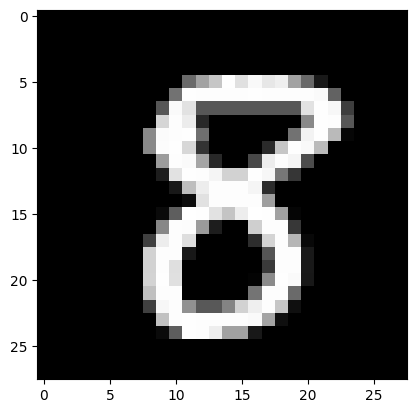

In [8]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [9]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [10]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [11]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [38]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [39]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [40]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=.001),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7504 - loss: 0.8215 - val_accuracy: 0.9326 - val_loss: 0.2187
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9188 - loss: 0.2772 - val_accuracy: 0.9493 - val_loss: 0.1580
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9369 - loss: 0.2103 - val_accuracy: 0.9628 - val_loss: 0.1224
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9452 - loss: 0.1862 - val_accuracy: 0.9651 - val_loss: 0.1147
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9526 - loss: 0.1598 - val_accuracy: 0.9699 - val_loss: 0.1039
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9557 - loss: 0.1477 - val_accuracy: 0.9698 - val_loss: 0.1021
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9592 - loss: 0.1318 - val_accuracy: 0.9696 - val_loss: 0.1012
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9602 - loss: 0.1316 - val_accuracy: 0.

Use Keras evaluate function to evaluate performance on the test set

In [41]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10029709339141846
Test accuracy: 0.9769999980926514


Interpret the result

The results show that the model's loss is 1%, with an accuracy of 97%. It implies that the model is highly accurate in predicting numbers.

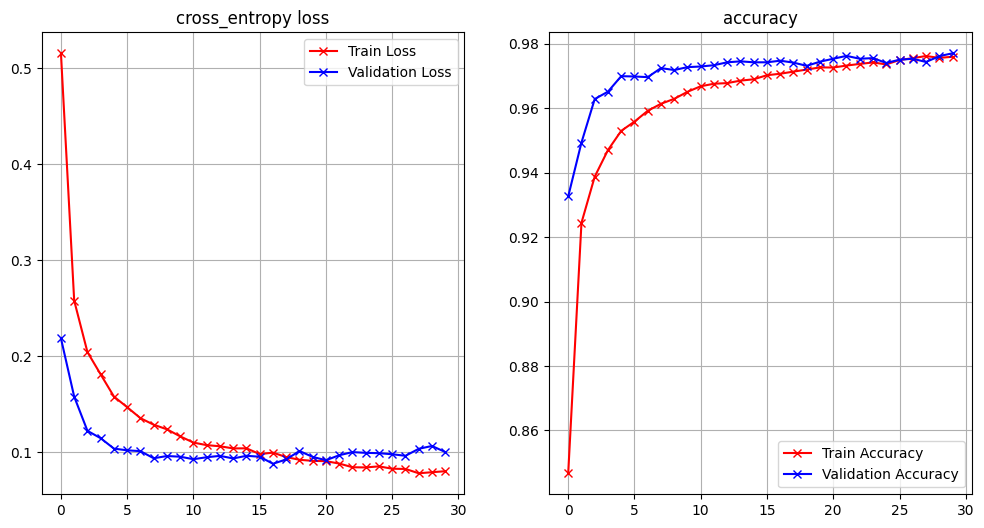

In [42]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

Based on the graph, it shows that the training and validation accuracy are almost parallel with each other, which indicates that the model is highly accurate in predictions. The cross entropy loss shows that the losses are also parallel with each other and is also just right; the model does not overfit nor underfit.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [55]:
model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='softmax'))

In [56]:
model_1.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437,310 (1.67 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

4. How many parameters does your model have?  How does it compare with the previous model?

`model_1` has 2x the total parameters than `model`. This is because of the higher sizes.

In [57]:
lr = .001
model_1.compile(optimizer=RMSprop(learning_rate=lr), loss="categorical_crossentropy", metrics=['accuracy'])
epochs = 20
batch_size = 128
history_2 = model_1.fit(x_train,
                        y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        verbose=1
                                      )

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8246 - loss: 0.5658 - val_accuracy: 0.9609 - val_loss: 0.1286
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9527 - loss: 0.1592 - val_accuracy: 0.9705 - val_loss: 0.0967
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9641 - loss: 0.1186 - val_accuracy: 0.9728 - val_loss: 0.0842
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9706 - loss: 0.0974 - val_accuracy: 0.9763 - val_loss: 0.0749
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9729 - loss: 0.0892 - val_accuracy: 0.9808 - val_loss: 0.0675
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9773 - loss: 0.0796 - val_accuracy: 0.9812 - val_loss: 0.0650
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9790 - loss: 0.0703 - val_accuracy: 0.9808 - val_loss: 0.0691
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9819 - loss: 0.0645 - val_acc

In [58]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07192262262105942
Test accuracy: 0.9847000241279602


In [78]:
from keras import regularizers
model_2 = Sequential([Dense(128, input_shape=(784,), activation="relu6",
          kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-6)),
    Dropout(0.2),
    Dense(512, activation="relu6",
          kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-6)),
    Dropout(0.2),
    Dense(128, activation="relu6"),
    Dropout(0.2),
    Dense(10, activation="softmax")])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model_2.compile(
                optimizer="adam",
                loss="categorical_crossentropy",
                metrics=['accuracy']
                )
history_3 = model_2.fit(
                  x_train,
                  y_train,
                  batch_size=128,
                  epochs=64,
                  validation_data=(x_test, y_test)
                  )


Epoch 1/64
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7964 - loss: 0.7143 - val_accuracy: 0.9554 - val_loss: 0.2012
Epoch 2/64
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9495 - loss: 0.2299 - val_accuracy: 0.9671 - val_loss: 0.1657
Epoch 3/64
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9642 - loss: 0.1797 - val_accuracy: 0.9743 - val_loss: 0.1408
Epoch 4/64
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9694 - loss: 0.1612 - val_accuracy: 0.9725 - val_loss: 0.1485
Epoch 5/64
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9728 - loss: 0.1474 - val_accuracy: 0.9762 - val_loss: 0.1363
Epoch 6/64
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9758 - loss: 0.1399 - val_accuracy: 0.9799 - val_loss: 0.1256
Epoch 7/64
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9778 - loss: 0.1293 - val_accuracy: 0.9790 - val_loss: 0.1304
Epoch 8/64
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9794 - loss: 0.1250 - val_accu

In [80]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12878333032131195
Test accuracy: 0.9819999933242798


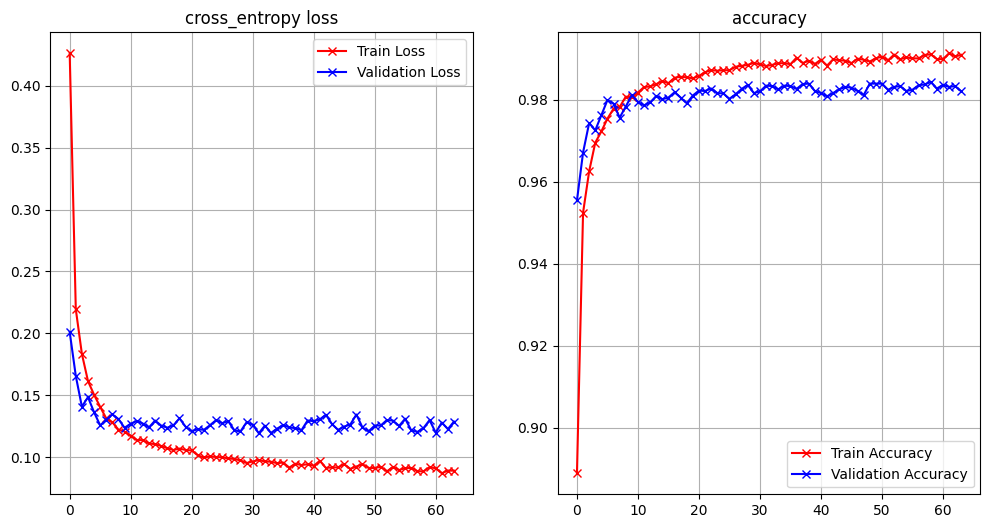

In [82]:
plot_loss_accuracy(history_3)

#### Conclusion

In conclusion, I was able to build and train neural networks with regularization using L1_L2 regularization and the Dropout. Additionally, I was able to visualize the model with regularization by plotting the loss and accuracy of the training and validation sets. Lastly, evaluation of the results of models with regularization was done by comparing their scores. Model_1 had a higher validation accuracy with 98.4% and lesser loss with 0.7%, while Model_2 had a lesser accuracy with 98.2% and higher loss with 1.2%.